<a href="https://colab.research.google.com/github/Houssem23x/Heart_disease/blob/master/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Prepare Problem**

# *a) Load libraries*





In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline 
sns.set_style('whitegrid')

# *b) Load dataset* 



In [57]:
opened_file = open('/content/drive/My Drive/Python/heart1.txt')
read_file =  opened_file.read()

#the values of the data set are after @data in heart1.txt
index = read_file.find('@data') 
data = read_file[index+5:].split()
data1 = []

for line in data:
  data1.append(line.split(','))
raw_data = pd.DataFrame(data1)

columns = ['age','sex','chest','resting_blood_pressure','serum_cholestoral',
           'fasting_blood_sugar','resting_electrocardiographic_results',
           'maximum_heart_rate_achieved','exercise_induced_angina','oldpeak',
           'slope','number_of_major_vessels','thal','class']
raw_data.columns = columns

raw_data.head()


,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,present
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,absent
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,present
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,absent
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,absent


In [58]:
#we need to chnage the type of the attributes 
raw_data.dtypes.to_frame('type')

,type
age,object
sex,object
chest,object
resting_blood_pressure,object
serum_cholestoral,object
fasting_blood_sugar,object
resting_electrocardiographic_results,object
maximum_heart_rate_achieved,object
exercise_induced_angina,object
oldpeak,object


In [59]:
int_col = ['age','resting_blood_pressure','serum_cholestoral', #integers
           'maximum_heart_rate_achieved',
           'number_of_major_vessels']
for col in int_col:
  raw_data[col] = raw_data[col].astype(int)

category_col = ['sex','chest','thal','fasting_blood_sugar', #categories
                'exercise_induced_angina','slope',
                'resting_electrocardiographic_results']
for col in category_col:
  raw_data[col] = raw_data[col].astype('category')

raw_data['oldpeak'] = raw_data['oldpeak'].astype(float) #float

raw_data.dtypes.to_frame('type')

,type
age,int64
sex,category
chest,category
resting_blood_pressure,int64
serum_cholestoral,int64
fasting_blood_sugar,category
resting_electrocardiographic_results,category
maximum_heart_rate_achieved,int64
exercise_induced_angina,category
oldpeak,float64


In [60]:
#converting the target attribute to binary 
raw_data['class'] = raw_data['class'].map({'present':1,'absent':0})
raw_data.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [61]:
#spliting the features to categotical and numerical features
categorical_features = category_col
numerical_features = int_col + ['oldpeak']

# **2. Summarize Data**

# *a) Descriptive statistics*


In [62]:
pd.set_option('precision',2)
raw_data.describe()


,age,resting_blood_pressure,serum_cholestoral,maximum_heart_rate_achieved,oldpeak,number_of_major_vessels,class
count,270.00,270.00,270.00,270.00,270.00,270.00,270.00
mean,54.43,131.34,249.66,149.68,1.05,0.67,0.44
std,9.11,17.86,51.69,23.17,1.15,0.94,0.50
min,29.00,94.00,126.00,71.00,0.00,0.00,0.00
25%,48.00,120.00,213.00,133.00,0.00,0.00,0.00
50%,55.00,130.00,245.00,153.50,0.80,0.00,0.00
75%,61.00,140.00,280.00,166.00,1.60,1.00,1.00
max,77.00,200.00,564.00,202.00,6.20,3.00,1.00


- we have no missing values.



In [63]:
raw_data[categorical_features].describe()

,sex,chest,thal,fasting_blood_sugar,exercise_induced_angina,slope,resting_electrocardiographic_results
count,270,270,270,270,270,270,270
unique,2,4,3,2,2,3,3
top,1,4,3,0,0,1,2
freq,183,129,152,230,181,130,137


In [64]:
for col in categorical_features:
  print(raw_data.groupby(by=col).size().to_frame('count'))
  print('-'*60)

     count
sex       
0       87
1      183
------------------------------------------------------------
       count
chest       
1         20
2         42
3         79
4        129
------------------------------------------------------------
      count
thal       
3       152
6        14
7       104
------------------------------------------------------------
                     count
fasting_blood_sugar       
0                      230
1                       40
------------------------------------------------------------
                         count
exercise_induced_angina       
0                          181
1                           89
------------------------------------------------------------
       count
slope       
1        130
2        122
3         18
------------------------------------------------------------
                                      count
resting_electrocardiographic_results       
0                                       131
1                      

In [65]:
#Investigating the correlation between the attributes 
raw_data.corr()

,age,resting_blood_pressure,serum_cholestoral,maximum_heart_rate_achieved,oldpeak,number_of_major_vessels,class
age,1.00,0.27,0.22,-0.40,0.19,0.36,0.21
resting_blood_pressure,0.27,1.00,0.17,-0.04,0.22,0.09,0.16
serum_cholestoral,0.22,0.17,1.00,-0.02,0.03,0.13,0.12
maximum_heart_rate_achieved,-0.40,-0.04,-0.02,1.00,-0.35,-0.27,-0.42
oldpeak,0.19,0.22,0.03,-0.35,1.00,0.26,0.42
number_of_major_vessels,0.36,0.09,0.13,-0.27,0.26,1.00,0.46
class,0.21,0.16,0.12,-0.42,0.42,0.46,1.00


- form the correlation tables, we can see that there is no strong corr between our features.

In [66]:
#inverstigating the skewness of the features 
raw_data.skew()

age                                    -0.16
sex                                    -0.77
chest                                  -0.88
resting_blood_pressure                  0.72
serum_cholestoral                       1.18
fasting_blood_sugar                     1.99
resting_electrocardiographic_results   -0.04
maximum_heart_rate_achieved            -0.53
exercise_induced_angina                 0.73
oldpeak                                 1.26
slope                                   0.54
number_of_major_vessels                 1.21
thal                                    0.29
class                                   0.22
dtype: float64

In [67]:
#Investigating the target variable
print(raw_data.groupby('class').size().to_frame('count'))

       count
class       
0        150
1        120


In [68]:
for col in categorical_features:
  print(raw_data.groupby(col)['class'].mean().to_frame('percentage'))
  print('-' * 60)

     percentage
sex            
0          0.23
1          0.55
------------------------------------------------------------
       percentage
chest            
1            0.25
2            0.17
3            0.22
4            0.71
------------------------------------------------------------
      percentage
thal            
3           0.22
6           0.57
7           0.76
------------------------------------------------------------
                     percentage
fasting_blood_sugar            
0                          0.45
1                          0.42
------------------------------------------------------------
                         percentage
exercise_induced_angina            
0                              0.30
1                              0.74
------------------------------------------------------------
       percentage
slope            
1            0.25
2            0.64
3            0.56
------------------------------------------------------------
               

# b) Data visualizations


# b).1 Univariate Plots

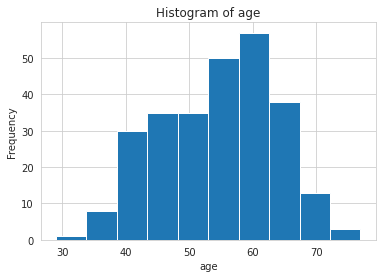

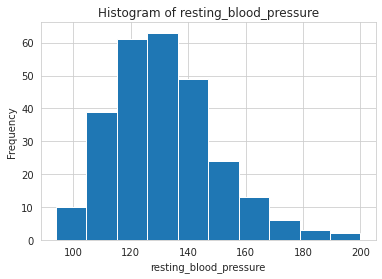

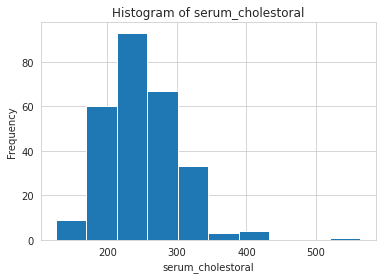

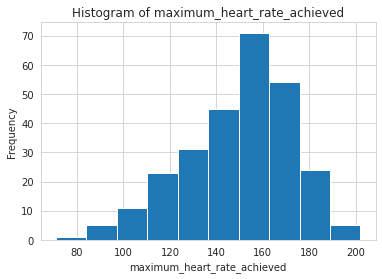

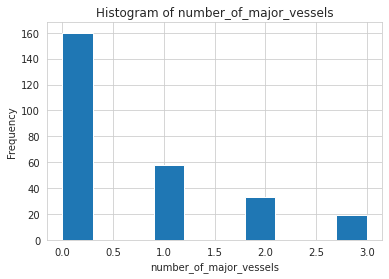

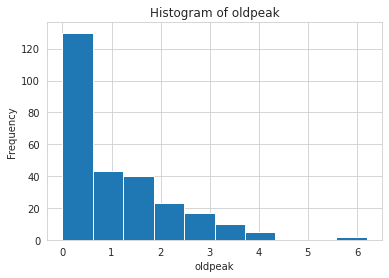

In [69]:
#Histogram 
for col in numerical_features:
  plt.hist(raw_data[col])
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title('Histogram of ' + col)
  plt.show()

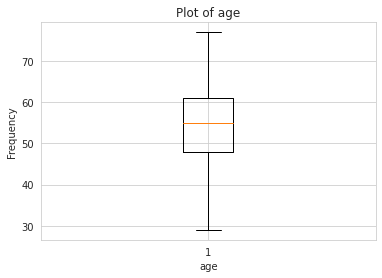

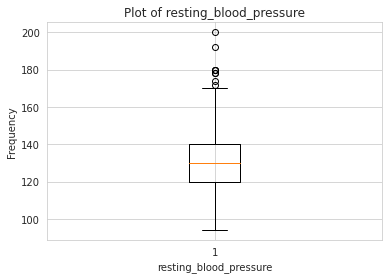

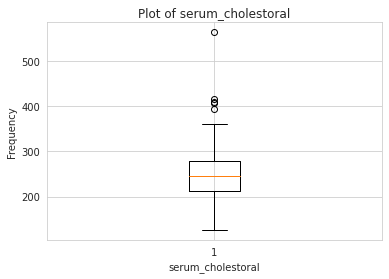

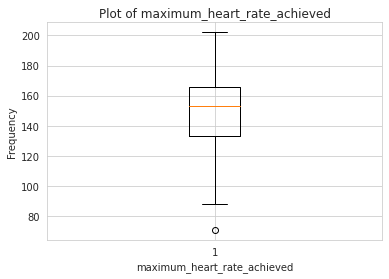

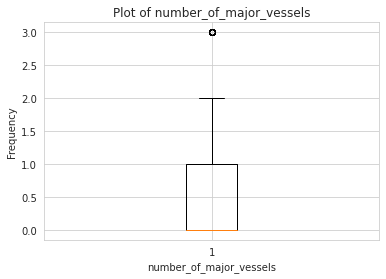

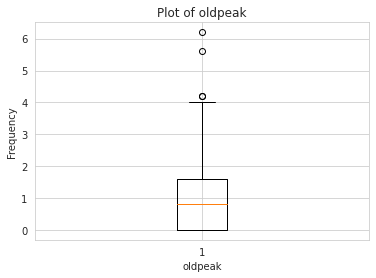

In [70]:
#Boxplot
for col in numerical_features:
  plt.boxplot(raw_data[col])
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title('Plot of '+col)
  plt.show()

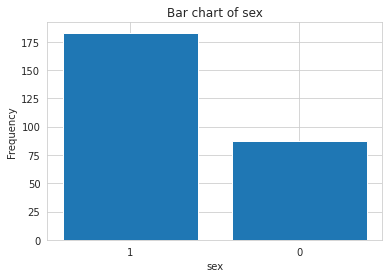

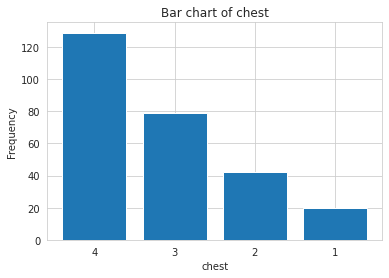

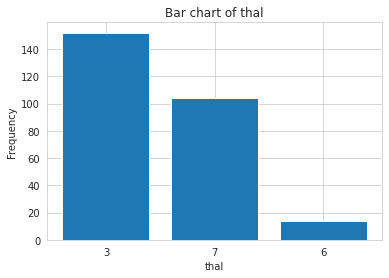

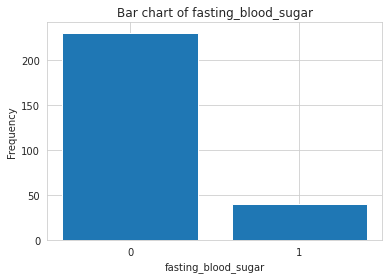

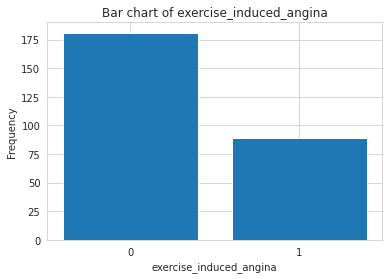

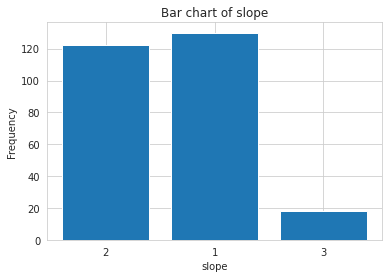

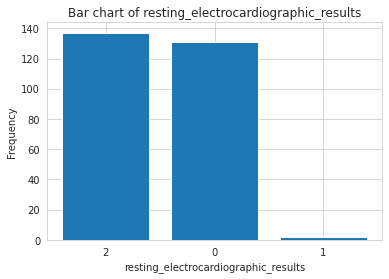

In [71]:
#Bar Chart
for col in categorical_features:
  values = list(raw_data[col])
  x = raw_data[col].unique()
  y = [values.count(k) for k in x]
  plt.bar(x,y)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title('Bar chart of '+col)
  plt.show()

# b).2 Bivariate Plots

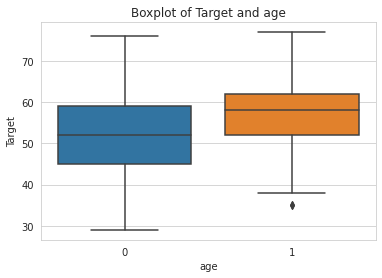

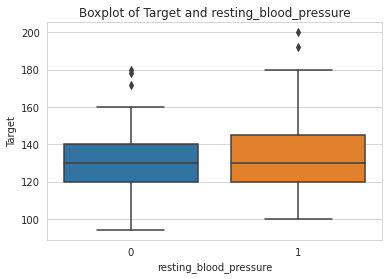

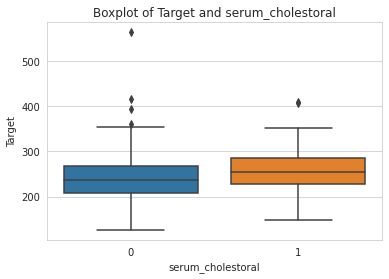

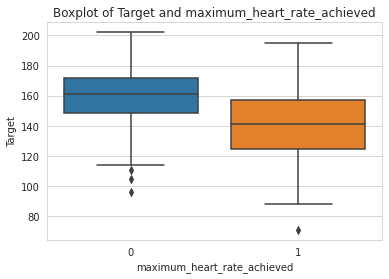

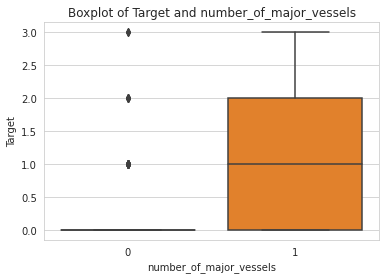

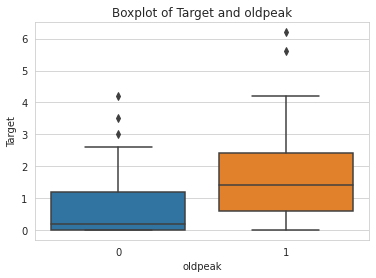

In [72]:
# the relationship between the numerical feartures and the target 
#Box plot
for col in numerical_features:
  sns.boxplot(x='class',y=col,data=raw_data)
  plt.xlabel(col)
  plt.ylabel('Target')
  plt.title('Boxplot of Target and '+col)
  plt.show()

sex


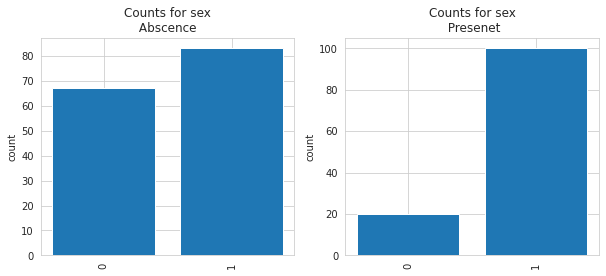

chest


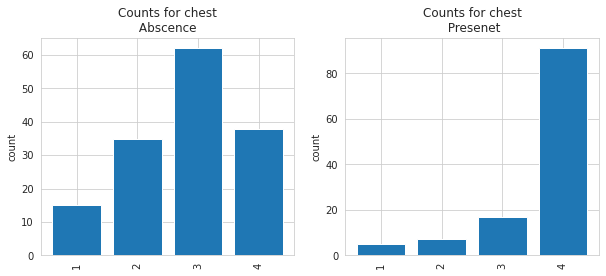

thal


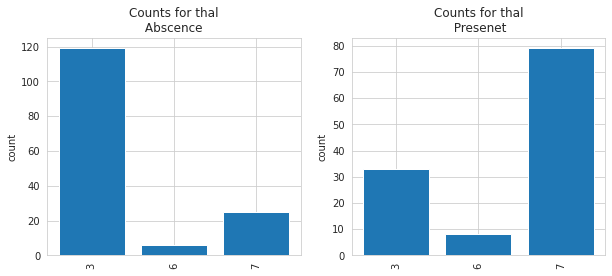

fasting_blood_sugar


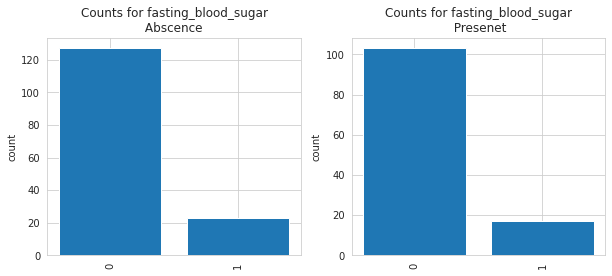

exercise_induced_angina


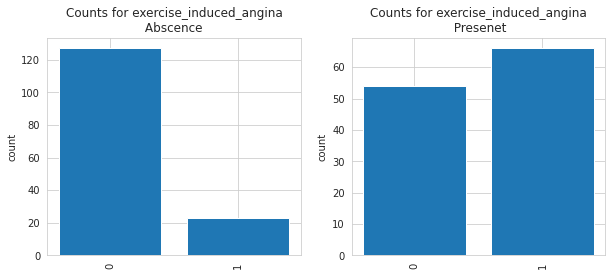

slope


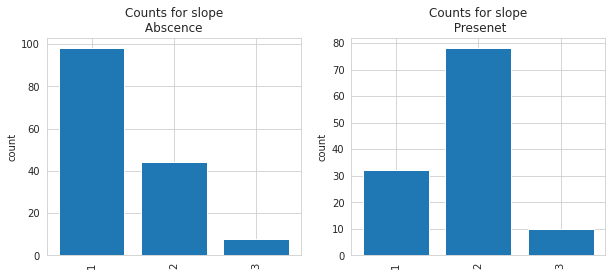

resting_electrocardiographic_results


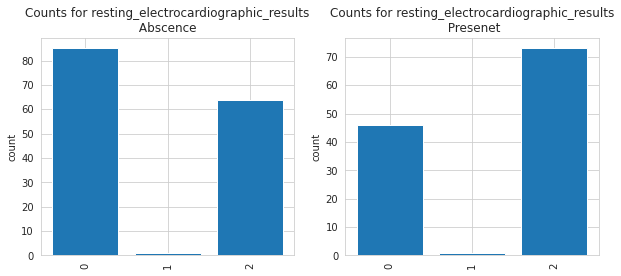

In [73]:
#The relationship between categorical features and the target
#Bar chart
raw_data['dummy'] = np.ones(shape = raw_data.shape[0])
for col in categorical_features:
    print(col)
    counts = raw_data[['dummy', 'class', col]].groupby(['class', col], as_index = False).count()
    temp = counts[counts['class'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['class'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Abscence ')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['class'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Presenet')
    plt.ylabel('count')
    plt.show()

# **3.Prepare Data**




# Feature Selection

In [74]:
#Investigating the best features 
features = categorical_features + numerical_features
X = raw_data[features]
y = raw_data['class']

best_features = SelectKBest(score_func=chi2)
best_features.fit(X,y)
result = dict(zip(features,best_features.scores_))
result_sr = pd.Series(result)
result_sr.sort_values()



fasting_blood_sugar                       0.06
slope                                     7.30
sex                                       7.71
resting_electrocardiographic_results      8.69
chest                                    13.33
resting_blood_pressure                   15.78
age                                      18.49
exercise_induced_angina                  31.82
serum_cholestoral                        40.09
oldpeak                                  58.70
thal                                     59.46
number_of_major_vessels                  74.12
maximum_heart_rate_achieved             168.93
dtype: float64

# **4.Evaluate Algorithms**

In [75]:
#split-out the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [76]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

names = []
results = []
for name,model in models:
  kfold = KFold(n_splits = 5,random_state=0)
  cv_results = cross_val_score(model,X_train,y_train,cv=kfold)
  results.append(cv_results)
  names.append(name)
  

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

In [77]:
#Evaluating the results
for name,cv_results in zip(names,results):
  print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.860994 (0.033277)
LDA: 0.870402 (0.043015)
KNN: 0.639112 (0.035070)
CART: 0.750106 (0.046749)
NB: 0.870296 (0.028190)
SVM: 0.629175 (0.062611)


In [83]:
#Evaluating the best 3 models on the test dataset
LR = LogisticRegression().fit(X_train,y_train)
LD = LinearDiscriminantAnalysis().fit(X_train,y_train)
NB = GaussianNB().fit(X_train,y_train)
best_models = [('LR',LR),
               ('LDA',LDA),
               ('NB',NB)]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [84]:
for name,model in best_models:
  print("%s: %f" % (name, model.score(X_test,y_test)))


LR: 0.833333
LDA: 0.759259
NB: 0.740741
